In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [169]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/SowjanyaPatnaik/Data-Science-notes/main/train.csv')

## Explanatory Data Analysis (EDA)

In [170]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [171]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [172]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
100*titanic_df.isna().sum()/titanic_df.shape[0] ##percentage of NA values in our dataset

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [174]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Questions to ask:

1. Analyse the distribution in x variable/who were the passengers
2. Analyse the distribution in the Y-variable/understand the distribution in the survived column
3. Analyse the relation between X and Y. Find out which attributes are affecting the Y variable


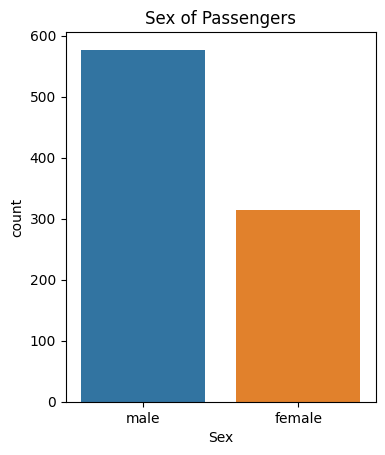

Proportion of each SES:
male      0.647587
female    0.352413
Name: Sex, dtype: float64


In [175]:
# Distribution in sex column

plt.figure().set_figwidth(4)
sns.countplot(x='Sex',data=titanic_df)
plt.title('Sex of Passengers')
plt.show()

# find total and percent amount of women
sex_prop = titanic_df['Sex'].value_counts()/titanic_df.shape[0]
print(f'Proportion of each SES:\n{sex_prop}')

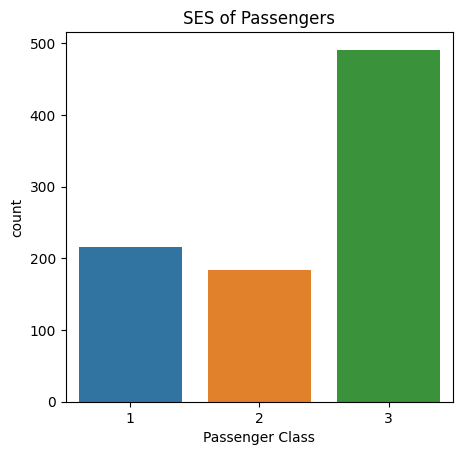

Proportion of each SES:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


In [176]:
# Distribution in Pclass column
plt.figure().set_figwidth(5)

sns.countplot(x='Pclass',data=titanic_df)

plt.xlabel('Passenger Class')
plt.title('SES of Passengers')
plt.show()
ses_prop = titanic_df['Pclass'].value_counts()/titanic_df.shape[0]
print(f'Proportion of each SES:\n{ses_prop}')

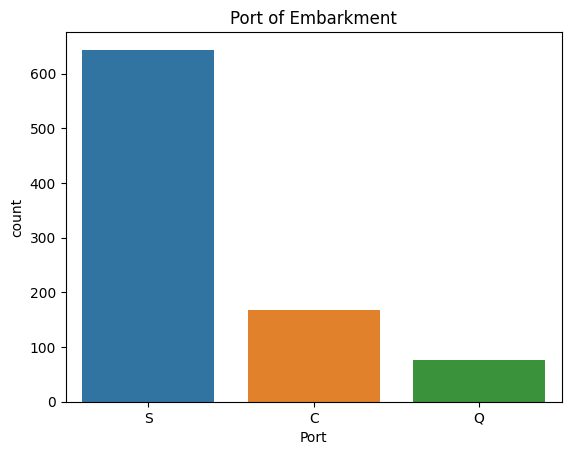

Proportion of each SES:
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


In [177]:
# Distribution in Embarked column
sns.countplot(x='Embarked',data=titanic_df)

plt.title('Port of Embarkment')
plt.xlabel('Port')
plt.show()
port_p = titanic_df['Embarked'].value_counts()/titanic_df.shape[0]
print(f'Proportion of each SES:\n{port_p}')

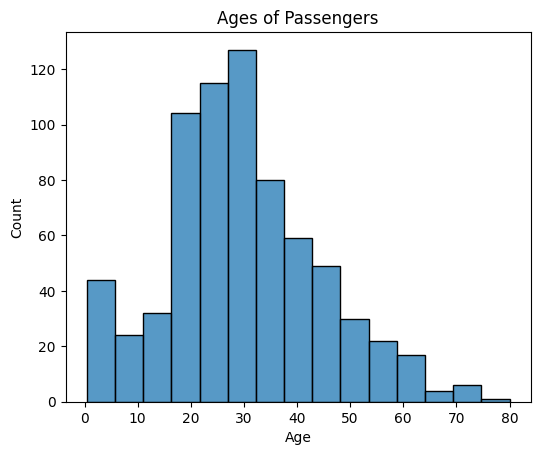

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [178]:
plt.figure().set_figwidth(6)

sns.histplot(titanic_df['Age'], bins = 15)

plt.title('Ages of Passengers')
plt.show()
titanic_df['Age'].describe()

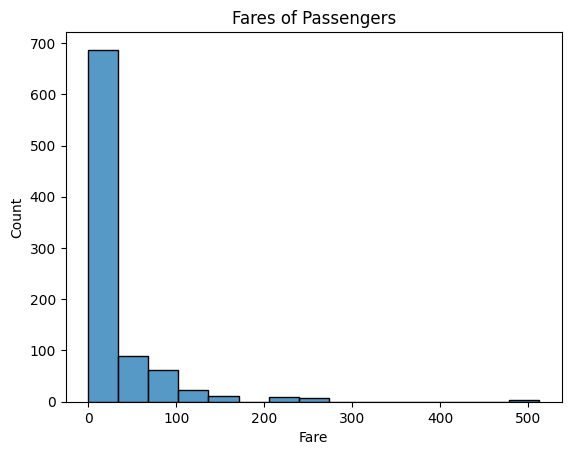

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [179]:
sns.histplot(titanic_df['Fare'], bins = 15)

plt.title('Fares of Passengers')
plt.show()

titanic_df['Fare'].describe()

## Multivariate Analysis

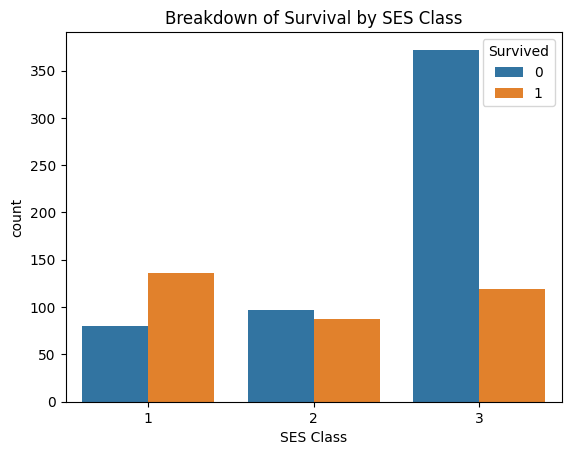

Upper class survived: 136
Middle class survived: 87
Lower class survived: 119
Upper class total: 216
Middle class total: 184
Lower class total: 491


C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\3219328525.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  upper_surv = class_1[titanic_df['Survived'] == 1]['PassengerId'].count()
C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\3219328525.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid_surv = class_2[titanic_df['Survived'] == 1]['PassengerId'].count()
C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\3219328525.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_surv = class_3[titanic_df['Survived'] == 1]['PassengerId'].count()


In [180]:
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')

plt.xlabel('SES Class')
plt.title('Breakdown of Survival by SES Class')
plt.show()

class_1 = titanic_df[titanic_df['Pclass'] == 1]
class_2 = titanic_df[titanic_df['Pclass'] == 2]
class_3 = titanic_df[titanic_df['Pclass'] == 3]
upper_surv = class_1[titanic_df['Survived'] == 1]['PassengerId'].count()
mid_surv = class_2[titanic_df['Survived'] == 1]['PassengerId'].count()
low_surv = class_3[titanic_df['Survived'] == 1]['PassengerId'].count()
upper = class_1['PassengerId'].count()
mid = class_2['PassengerId'].count()
low = class_3['PassengerId'].count()

print(f'Upper class survived: {upper_surv}')
print(f'Middle class survived: {mid_surv}')
print(f'Lower class survived: {low_surv}')

print(f'Upper class total: {upper}')
print(f'Middle class total: {mid}')
print(f'Lower class total: {low}')

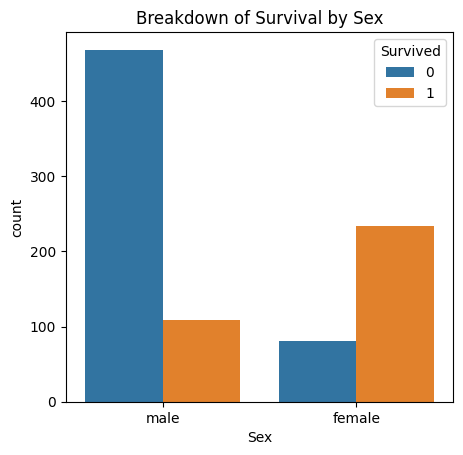

% males survived
0.18890814558058924
% females survived
0.7420382165605095


C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\1867457940.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(male[titanic_df['Survived'] == 1]['PassengerId'].count()/male['PassengerId'].count())
C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\1867457940.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(female[titanic_df['Survived'] == 1]['PassengerId'].count()/female['PassengerId'].count())


In [181]:
plt.figure().set_figwidth(5)

sns.countplot(x='Sex', data=titanic_df, hue='Survived')

plt.title('Breakdown of Survival by Sex')
plt.show()

male = titanic_df[titanic_df['Sex'] == 'male']
female = titanic_df[titanic_df['Sex'] == 'female']

print('% males survived')
print(male[titanic_df['Survived'] == 1]['PassengerId'].count()/male['PassengerId'].count())
print('% females survived')
print(female[titanic_df['Survived'] == 1]['PassengerId'].count()/female['PassengerId'].count())

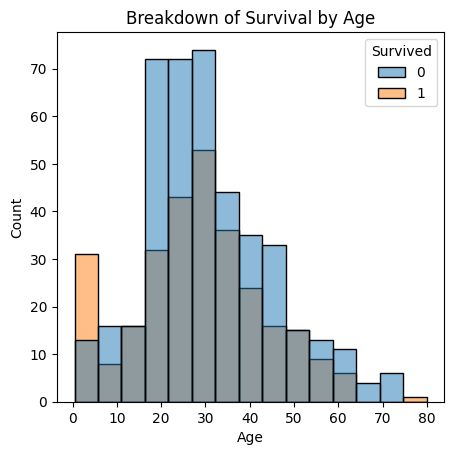

In [182]:
plt.figure().set_figwidth(5)

sns.histplot(x='Age', data=titanic_df, hue='Survived', bins= 15)

plt.title('Breakdown of Survival by Age')
plt.show()

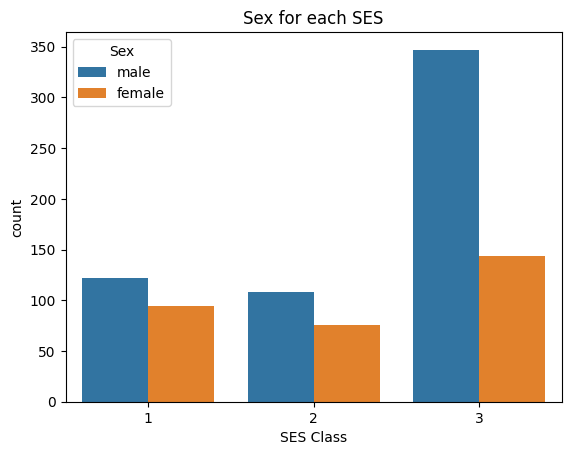

In [183]:
sns.countplot(x='Pclass',data=titanic_df, hue='Sex')

plt.xlabel('SES Class')
plt.title('Sex for each SES')
plt.show()

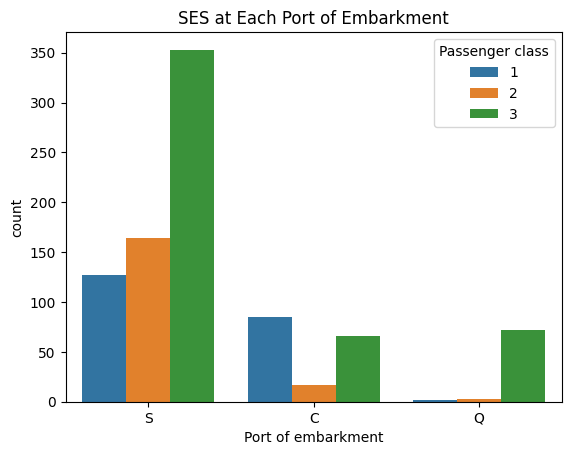

In [184]:
sns.countplot(x='Embarked',data=titanic_df, hue='Pclass')

plt.legend(title='Passenger class')
plt.xlabel('Port of embarkment')
plt.title('SES at Each Port of Embarkment')
plt.show()

In [185]:
titanic_df['Cabin'].isna().sum()

687

In [186]:
levels=[]

levels = [i[0] for i in titanic_df['Cabin'].dropna()]

In [187]:
cabin = pd.DataFrame(levels, columns=['Cabin'])

<AxesSubplot: xlabel='Cabin', ylabel='count'>

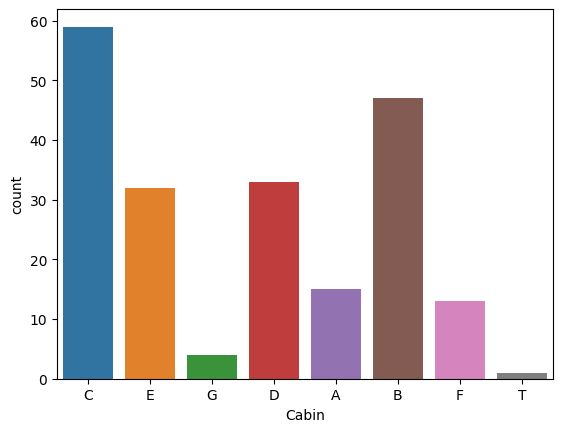

In [188]:
sns.countplot(x='Cabin', data=cabin)

In [189]:
titanic_df['Alone']=titanic_df['SibSp'] + titanic_df['Parch']

In [190]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]=='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]=='Alone'

2      False
4      False
5      False
6      False
11     False
       ...  
884    False
886    False
887    False
889    False
890    False
Name: Alone, Length: 537, dtype: bool

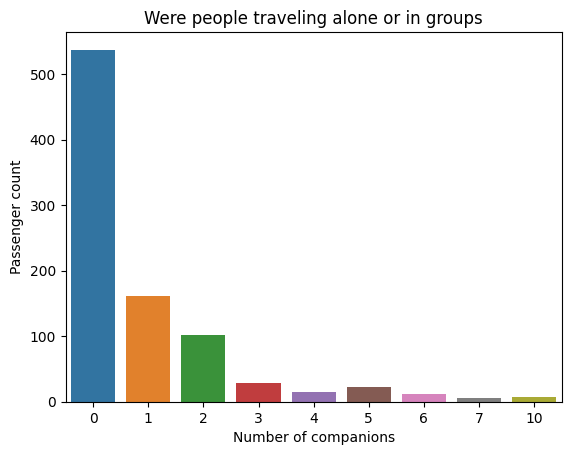

In [191]:
sns.countplot(x='Alone', data=titanic_df)

plt.xlabel('Number of companions')
plt.ylabel('Passenger count')
plt.title('Were people traveling alone or in groups')
plt.show()


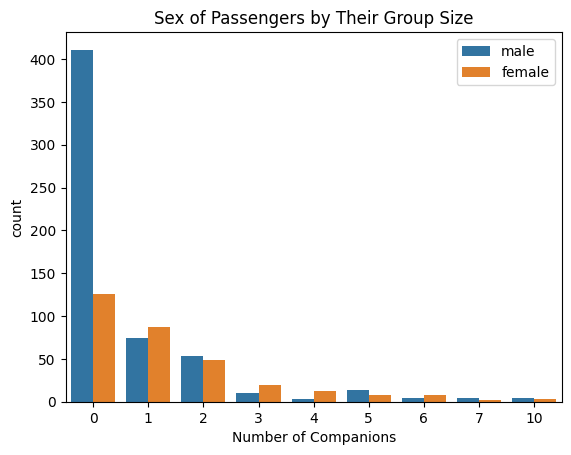

In [192]:
sns.countplot(x='Alone',data=titanic_df, hue='Sex')

plt.legend()
plt.xlabel('Number of Companions')
plt.title('Sex of Passengers by Their Group Size')
plt.show()

In [193]:
features = ['Age', 'Alone', 'Pclass', 'Sex', 'Embarked']

titanic_df['Sex'] = titanic_df['Sex'].replace({'female': 0, 'male': 1})

titanic_df['Embarked'] = titanic_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


for n in features:
    correlation = titanic_df['Survived'].corr(titanic_df[n], method='pearson')
    print(f'The correlation of survival and {n} is: {correlation}')


The correlation of survival and Age is: -0.07722109457217755
The correlation of survival and Alone is: 0.01663898928274525
The correlation of survival and Pclass is: -0.3384810359610148
The correlation of survival and Sex is: -0.5433513806577547
The correlation of survival and Embarked is: 0.10866867101787404


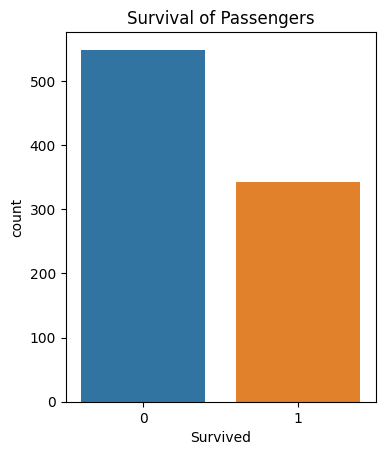

% survived: 0.38
Survivors: 342


In [194]:
plt.figure().set_figwidth(4)

sns.countplot(x='Survived', data=titanic_df)

plt.title('Survival of Passengers')
plt.show()

survivedcount = titanic_df[titanic_df['Survived'] == 1]['PassengerId'].count()
totalcount = titanic_df['PassengerId'].count()

survive_p = survivedcount/totalcount

print(f'% survived: {survive_p:.2f}')
print(f'Survivors: {survivedcount}')

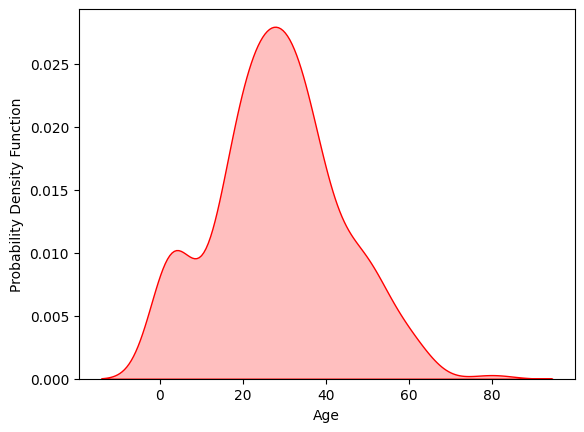

In [195]:
sns.kdeplot(titanic_df.loc[(titanic_df['Survived']==1),'Age'], color='r', fill=True) # create kde plot
plt.xlabel('Age')
plt.ylabel('Probability Density Function')
plt.show()

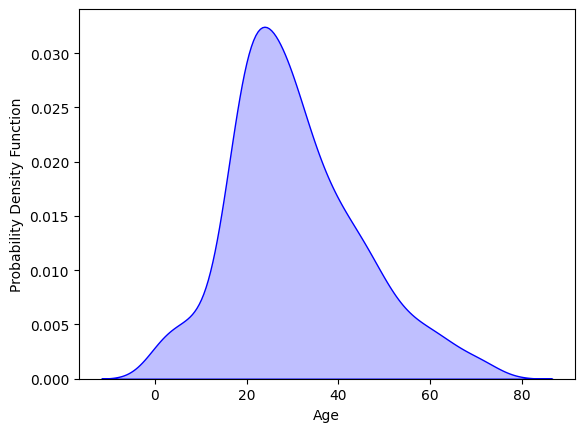

In [196]:
sns.kdeplot(titanic_df.loc[(titanic_df['Survived']==0),'Age'], color='b', fill=True)
plt.xlabel('Age')
plt.ylabel('Probability Density Function')
plt.show()

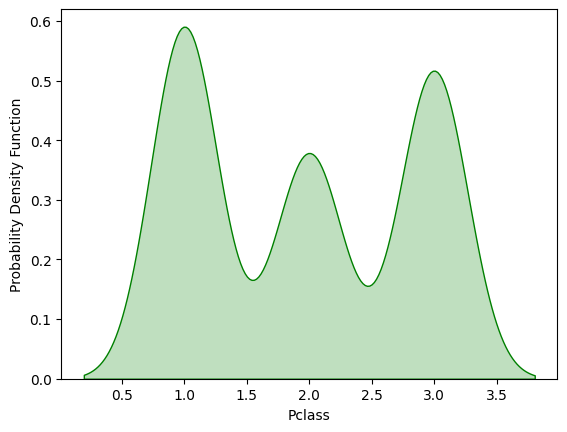

In [197]:
sns.kdeplot(titanic_df.loc[(titanic_df['Survived']==1),'Pclass'], color='g', fill=True)
plt.xlabel('Pclass')
plt.ylabel('Probability Density Function')
plt.show()

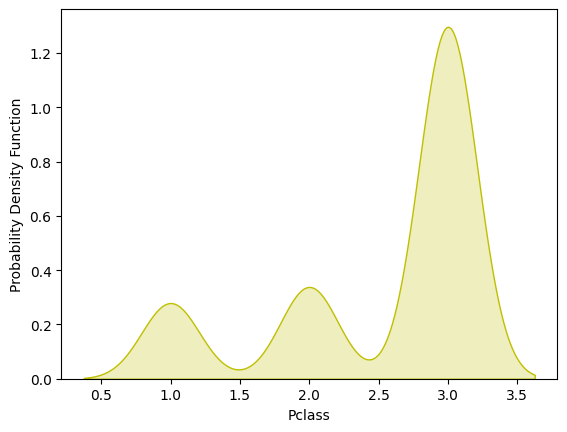

In [198]:
sns.kdeplot(titanic_df.loc[(titanic_df['Survived']==0),'Pclass'], color='y', fill=True)
plt.xlabel('Pclass')
plt.ylabel('Probability Density Function')
plt.show()

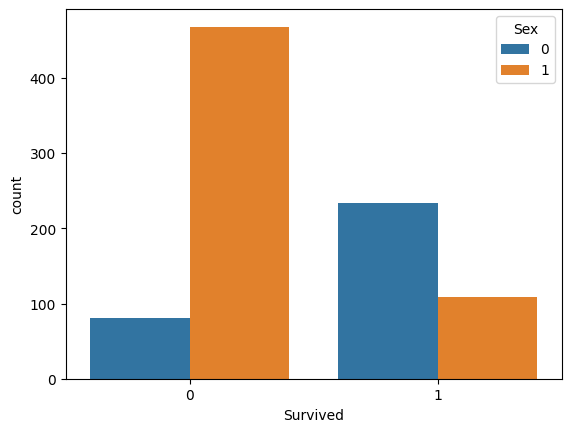

In [199]:
sns.countplot(x='Survived', data=titanic_df, hue='Sex')
plt.show()

In [200]:
def Person(Passenger):
    Sex,Age=Passenger
    if Age<16:
        return 'Child'
    else:
        return Sex

In [201]:
titanic_df['Person']=titanic_df[['Sex','Age']].apply(Person, axis=1)

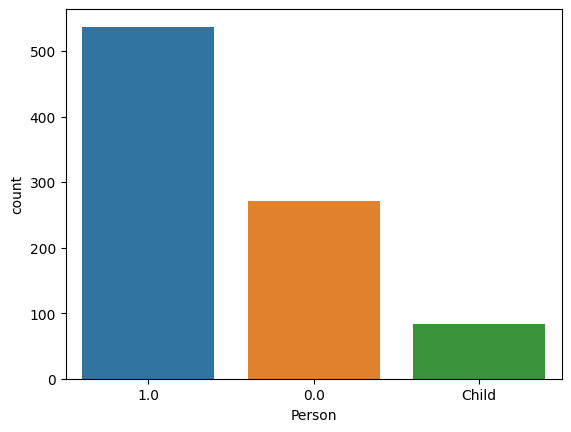

In [202]:
sns.countplot(x='Person', data=titanic_df)
plt.show()

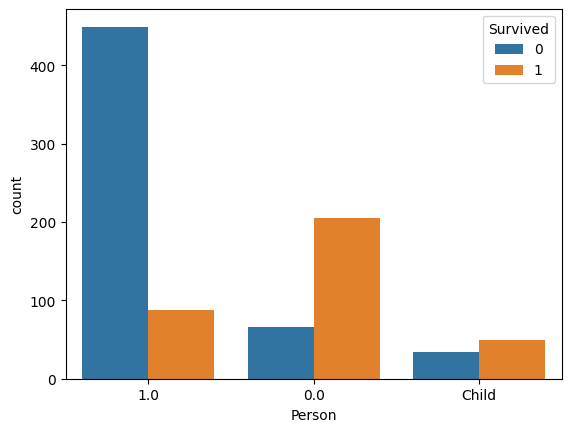

In [203]:
sns.countplot(x='Person', data=titanic_df, hue='Survived')
plt.show()

### Numerical variables vs categorical 

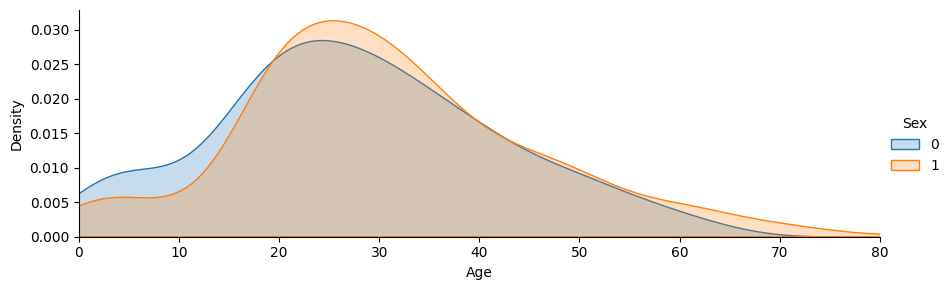

In [204]:
fig=sns.FacetGrid(titanic_df, hue='Sex',aspect=3)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()
plt.show()

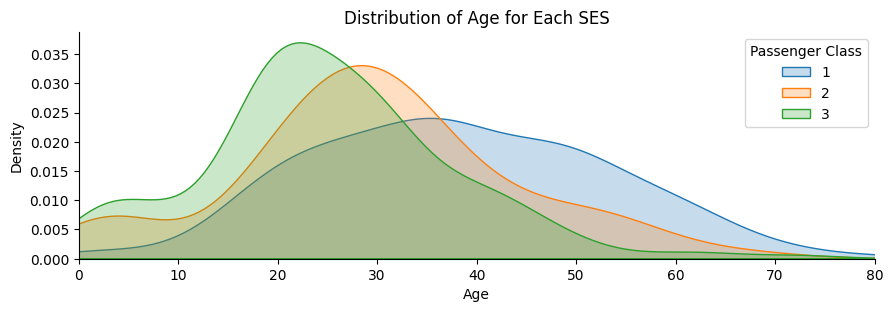

In [205]:
fig=sns.FacetGrid(titanic_df, hue='Pclass',aspect=3)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))


plt.title('Distribution of Age for Each SES')
plt.legend(title = 'Passenger Class')
plt.show()


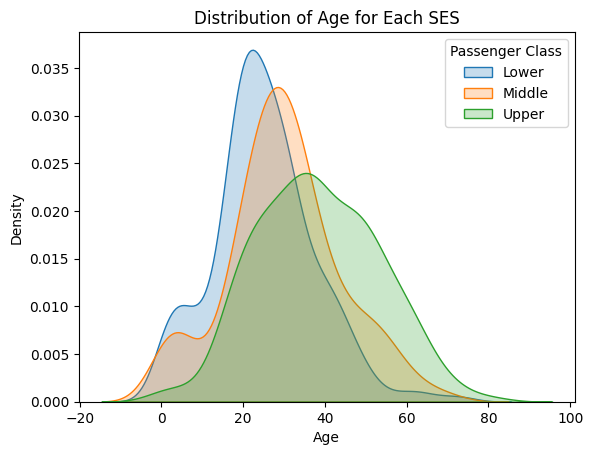

In [206]:
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 3]['Age'], label='Lower', fill=True, )
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 2]['Age'], label='Middle', fill=True)
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 1]['Age'], label='Upper', fill=True)

plt.title('Distribution of Age for Each SES')
plt.legend(title = 'Passenger Class')
plt.show()

## Model Building

# Data Cleaning

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [208]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Person
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0,1.0


In [209]:
titanic_df=titanic_df.drop(['Person', 'Cabin'],1)

C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\3621788570.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic_df=titanic_df.drop(['Person', 'Cabin'],1)


In [210]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Alone            0
dtype: int64

In [211]:
titanic_df['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [212]:
titanic_df['Embarked'].fillna('0.0',inplace=True)

In [213]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [214]:
titanic_df=pd.get_dummies(titanic_df, drop_first=True)

In [215]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(titanic_df.drop('Survived',1),titanic_df['Survived']
                                                  , stratify=titanic_df['Survived'])

C:\Users\Reed Oken\AppData\Local\Temp\ipykernel_16048\4008465159.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test=train_test_split(titanic_df.drop('Survived',1),titanic_df['Survived']


In [216]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [217]:
x_train[['Age','Fare']] = scaler.fit_transform(x_train[['Age','Fare']])
x_test[['Age','Fare']] = scaler.fit_transform(x_test[['Age','Fare']])

In [218]:
from sklearn.metrics import classification_report

model=RandomForestClassifier()
model.fit(x_train,y_train)
print('Results of the Random Forest is : \n')
print(classification_report(y_test,model.predict(x_test)))

Results of the Random Forest is : 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       137
           1       0.83      0.73      0.78        86

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [219]:
import statsmodels.api as sm

y = titanic_df['Survived']
x =  titanic_df[['Age', 'Pclass', 'Sex', 'Alone']]

model = sm.OLS(y, sm.add_constant(x)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     143.5
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.40e-94
Time:                        16:52:23   Log-Likelihood:                -399.44
No. Observations:                 891   AIC:                             808.9
Df Residuals:                     886   BIC:                             832.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3488      0.060     22.453      0.000       1.231       1.467
Age           -0.0059      0.001     -5.497      0.000      -0.008      -0.004
Pclass        -0.1843      0.016    -11.251      0.000      -0.216      -0.152
Sex           -0.5184      0.028    -18.771      0.000      -0.573      -0.464
Alone         -0.0314      0.008     -3.781      0.000      -0.048      -0.015
==============================================================================
Omnibus:                       38.676   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.740
Skew:                           0.533   Prob(JB):                     5.24e-10
Kurtosis:                       3.120   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""